# Kütüphanelerin Yüklenmesi 

In [25]:
import numpy as np
import os
import pandas as pd
from glob import glob
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator


dataset_path = '/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset'


# DataFrame Oluşturma

In [26]:
# Tüm görüntü dosyalarını bulma
image_paths = glob(os.path.join(dataset_path, '*/*/*.png'))

# Dosya adlarından etiketleri çıkarma
labels = [os.path.split(os.path.split(path)[0])[1] for path in image_paths]

# DataFrame oluşturma
df = pd.DataFrame({'filename': image_paths, 'label': labels})

# İlk birkaç satırı göster
print(df.head())



                                            filename            label
0  /kaggle/input/a-large-scale-fish-dataset/Fish_...  Hourse Mackerel
1  /kaggle/input/a-large-scale-fish-dataset/Fish_...  Hourse Mackerel
2  /kaggle/input/a-large-scale-fish-dataset/Fish_...  Hourse Mackerel
3  /kaggle/input/a-large-scale-fish-dataset/Fish_...  Hourse Mackerel
4  /kaggle/input/a-large-scale-fish-dataset/Fish_...  Hourse Mackerel


# Eğitim ve Test Kümelerini Ayırma

In [27]:
# Eğitim ve test kümesine ayırma
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['label'])

# Ayırdığımız kümeleri kontrol edelim
print(f"Train set size: {train_df.shape[0]}")
print(f"Test set size: {test_df.shape[0]}")


Train set size: 14400
Test set size: 3600


# Örnekleri Görselleştirme

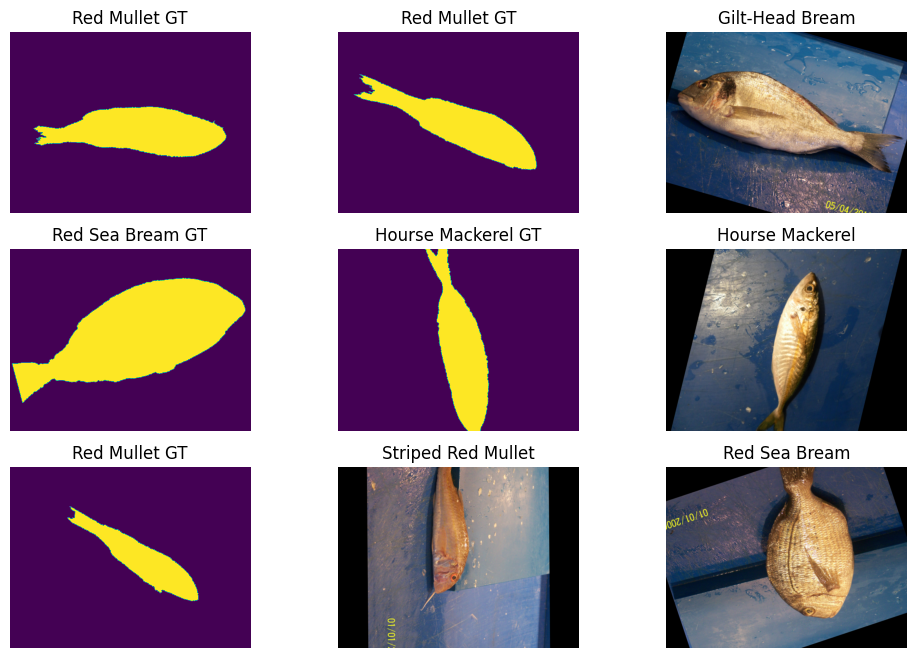

In [28]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# İlk birkaç görüntüyü görselleştirme
plt.figure(figsize=(12, 8))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = mpimg.imread(train_df['filename'].iloc[i])
    plt.imshow(img)
    plt.title(train_df['label'].iloc[i])
    plt.axis('off')
plt.show()




# Bütün Görüntüleri Eşit Boyutlandırma

In [29]:
# Görüntü boyutlarını tanımlama
img_height = 150  # Yükseklik
img_width = 150   # Genişlik

# Sınıf sayısını tanımlama
num_classes = df['label'].nunique()  # Etiketlerin sayısını al


# Model Oluşturma

In [30]:
# Model oluşturma
model = Sequential()

# İlk katman: Giriş katmanı ve Flatten
model.add(Flatten(input_shape=(img_height, img_width, 3)))

# Gizli katmanlar
model.add(Dense(128, activation='relu'))  # 128 düğümlü gizli katman
model.add(Dropout(0.5))  # %50 dropout

model.add(Dense(64, activation='relu'))  # 64 düğümlü gizli katman
model.add(Dropout(0.5))  # %50 dropout

# Çıkış katmanı
model.add(Dense(num_classes, activation='softmax'))  # num_classes sınıf sayısını temsil eder

# Modeli derleme
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy']) 


/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [32]:
# Test verisi için veri artırma ayarları
test_datagen = ImageDataGenerator(rescale=1./255)  # Sadece yeniden ölçeklendirme

# Test verisini oluşturma
test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='filename',
    y_col='label',
    target_size=(img_height, img_width),  # Görüntü boyutu
    batch_size=32,  # Batch boyutu
    class_mode='sparse',  # Sınıf modu
    shuffle=False)  # Karıştırma



Found 3600 validated image filenames belonging to 18 classes.


# Model Eğitimi

In [34]:
# Modeli eğitme
history = model.fit(train_generator,
                    steps_per_epoch=len(train_df) // 32,  # Adım sayısı
                    epochs=10,  # Epoch sayısı
                    validation_data=test_generator,  # Doğrulama verisi
                    validation_steps=len(test_df) // 32)  # Doğrulama adım sayısı


Epoch 1/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step - accuracy: 0.0486 - loss: 2.9268

/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


450/450 ━━━━━━━━━━━━━━━━━━━━ 246s 541ms/step - accuracy: 0.0486 - loss: 2.9268 - val_accuracy: 0.0564 - val_loss: 2.8890
Epoch 2/10


/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 2.8895
Epoch 3/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 225s 494ms/step - accuracy: 0.0496 - loss: 2.8921 - val_accuracy: 0.0558 - val_loss: 2.8904
Epoch 4/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 281us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 2.8915
Epoch 5/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 224s 492ms/step - accuracy: 0.0521 - loss: 2.8927 - val_accuracy: 0.0555 - val_loss: 2.8904
Epoch 6/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 287us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0625 - val_loss: 2.8894
Epoch 7/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 225s 493ms/step - accuracy: 0.0563 - loss: 2.8918 - val_accuracy: 0.0552 - val_loss: 2.8903
Epoch 8/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 280us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.1250 - val_loss: 2.8897
Epoch 9/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 224s 492ms/step

# Model Doğruluğunu Görselleştirme

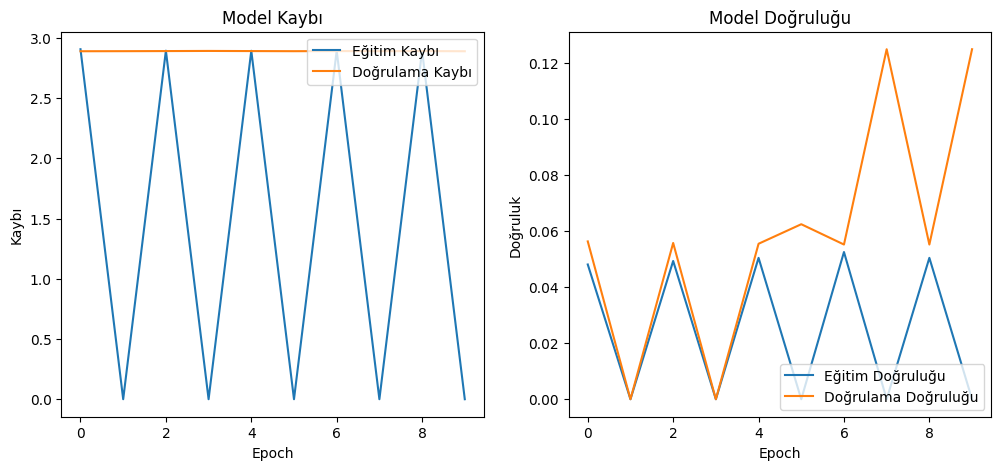

In [35]:
# Eğitim kaybı ve doğruluğunu görselleştirme
plt.figure(figsize=(12, 5))

# Kaybı görselleştirme
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.title('Model Kaybı')
plt.ylabel('Kaybı')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

# Doğruluğu görselleştirme
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.title('Model Doğruluğu')
plt.ylabel('Doğruluk')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

plt.show()


# Model Doğruluğunu Test Etme

In [36]:
test_loss, test_accuracy = model.evaluate(test_generator, steps=len(test_df) // 32)
print(f"Test Kaybı: {test_loss}, Test Doğruluğu: {test_accuracy}")


112/112 ━━━━━━━━━━━━━━━━━━━━ 26s 228ms/step - accuracy: 0.0596 - loss: 2.8904
Test Kaybı: 2.8903849124908447, Test Doğruluğu: 0.0552455373108387


# Hiperparametre Optimizasyonu

In [46]:
from sklearn.model_selection import ParameterGrid

# Hiperparametrelerin tanımlanması
param_grid = {
    'learning_rate': [0.001, 0.01],  # Daha az seçenekle başlamak
}

# Hiperparametre optimizasyonu
best_score = 0
best_params = {}

for params in ParameterGrid(param_grid):
    model = create_model(learning_rate=params['learning_rate'])
    
    # Modeli eğitme
    history = model.fit(train_generator, 
                        steps_per_epoch=len(train_df) // 32,
                        epochs=5,  # Epoch sayısını azaltın
                        validation_data=test_generator,
                        validation_steps=len(test_df) // 32,
                        verbose=0)
    
    # Doğrulama doğruluğunu kontrol et
    val_accuracy = history.history['val_accuracy'][-1]
    
    if val_accuracy > best_score:
        best_score = val_accuracy
        best_params = params

# En iyi parametrelerin yazdırılması
print(f"En iyi parametreler: {best_params} ile {best_score} doğruluğu")


En iyi parametreler: {'learning_rate': 0.001} ile 0.0558035708963871 doğruluğu
